# Wczytanie danych i odpowiednich pakietów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, roc_curve
from sklearn.svm import SVC
import sklearn.model_selection as skm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn . datasets import fetch_openml
from sklearn.model_selection import cross_val_score

In [2]:
df = fetch_openml ( data_id = 31)
y = df . target
X = df . data

In [3]:
X = pd.get_dummies(X)

In [4]:
y = pd.get_dummies(y)
y = y.good

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 320565)

## Część 1 

### Regresja logistyczna

In [6]:
lm1 = LogisticRegression(penalty = 'none', max_iter = 1000)
lm1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [7]:
y_pred_lm1_train = lm1.predict(X_train)
pred_lm1_train = lm1.predict_proba(X_train)

y_pred_lm1 = lm1.predict(X_test)
pred_lm1 = lm1.predict_proba(X_test)

#### Dla zbioru testowego

In [8]:
print("precision score lm1:", np.round(precision_score(y_test, y_pred_lm1), 3))
print("recall score lm1:", np.round(recall_score(y_test, y_pred_lm1), 3))
print("accuracy lm1:", np.round(accuracy_score(y_test, y_pred_lm1), 3))
print("auc lm1:", np.round(roc_auc_score(y_test, pred_lm1[:,1]), 3))

precision score lm1: 0.775
recall score lm1: 0.882
accuracy lm1: 0.747
auc lm1: 0.786


#### Dla zbioru treningowego

In [9]:
print("precision score lm1:", np.round(precision_score(y_train, y_pred_lm1_train), 3))
print("recall score lm1:", np.round(recall_score(y_train, y_pred_lm1_train), 3))
print("accuracy lm1:", np.round(accuracy_score(y_train, y_pred_lm1_train), 3))
print("auc lm1:", np.round(roc_auc_score(y_train, pred_lm1_train[:,1]), 3))

precision score lm1: 0.823
recall score lm1: 0.897
accuracy lm1: 0.79
auc lm1: 0.834


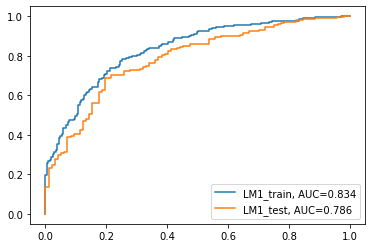

In [10]:
fpr, tpr, thresholds = roc_curve(y_train, pred_lm1_train[:,1])
plt.plot(fpr,tpr,label="LM1_train, AUC="+str(round(roc_auc_score(y_train, pred_lm1_train[:,1]), 3)))

fpr, tpr, thresholds = roc_curve(y_test, pred_lm1[:,1])
plt.plot(fpr,tpr,label="LM1_test, AUC="+str(round(roc_auc_score(y_test, pred_lm1[:,1]), 3)))
plt.legend()

### Model regresji logistycznej z regularyzacją L1

In [11]:
scores_all_2 = []
for i in range(100, 10000, 100):    
    lm = LogisticRegression(penalty = 'l1', max_iter = 1000, solver = 'liblinear', C = i / 1000, random_state = 320565)
    scores = cross_val_score(lm, X_train, y_train, cv = 5, scoring = 'roc_auc')
    scores = np.mean(scores)
    scores_all_2.append(scores)
    scores = 0 

In [12]:
np.max(scores_all_2)

0.7700533013057405

In [13]:
np.argmax(scores_all_2)

3

In [45]:
lm2 = LogisticRegression(penalty = 'l1', max_iter = 1000, solver = 'liblinear', C = 0.4)
lm2.fit(X_train, y_train)

LogisticRegression(C=0.4, max_iter=1000, penalty='l1', solver='liblinear')

In [46]:
y_pred_lm2_train = lm2.predict(X_train)
pred_lm2_train = lm2.predict_proba(X_train)
y_pred_lm2 = lm2.predict(X_test)
pred_lm2 = lm2.predict_proba(X_test)

#### Dla zbioru testowego

In [47]:
print("precision score lm2:", np.round(precision_score(y_test, y_pred_lm2), 3))
print("recall score lm2:", np.round(recall_score(y_test, y_pred_lm2), 3))
print("accuracy lm2:", np.round(accuracy_score(y_test, y_pred_lm2), 3))
print("auc lm2:", np.round(roc_auc_score(y_test, pred_lm2[:,1]), 3))

precision score lm2: 0.782
recall score lm2: 0.882
accuracy lm2: 0.753
auc lm2: 0.808


#### Dla zbioru treningowego

In [17]:
print("precision score lm2:", np.round(precision_score(y_train, y_pred_lm2_train), 3))
print("recall score lm2:", np.round(recall_score(y_train, y_pred_lm2_train), 3))
print("accuracy lm2:", np.round(accuracy_score(y_train, y_pred_lm2_train), 3))
print("auc lm2:", np.round(roc_auc_score(y_train, pred_lm2_train[:,1]), 3))

precision score lm2: 0.809
recall score lm2: 0.918
accuracy lm2: 0.787
auc lm2: 0.825


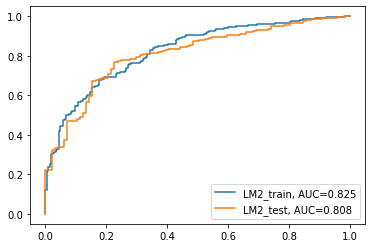

In [18]:
fpr, tpr, thresholds = roc_curve(y_train, pred_lm2_train[:,1])
plt.plot(fpr,tpr,label="LM2_train, AUC="+str(round(roc_auc_score(y_train, pred_lm2_train[:,1]), 3)))

fpr, tpr, thresholds = roc_curve(y_test, pred_lm2[:,1])
plt.plot(fpr,tpr,label="LM2_test, AUC="+str(round(roc_auc_score(y_test, pred_lm2[:,1]), 3)))
plt.legend()
plt.savefig("pdu2_2.pdf", format = 'pdf')

### Model regresji logistycznej z regularyzacją L2

In [48]:
scores_all_3 = []
for i in range(100, 10000, 100):    
    lm = LogisticRegression(penalty = 'l2', max_iter = 3000, C = i / 1000, random_state = 320565)
    scores = cross_val_score(lm, X_train, y_train, cv = 5, scoring = 'roc_auc')
    scores = np.mean(scores)
    scores_all_3.append(scores)
    scores = 0 

In [20]:
np.max(scores_all_3)

0.7729573663463907

In [21]:
np.argmax(scores_all_3)

1

In [49]:
lm3 = LogisticRegression(penalty = 'l2', max_iter = 3000, C = 0.2)
lm3.fit(X_train, y_train)

LogisticRegression(C=0.2, max_iter=3000)

In [50]:
y_pred_lm3_train = lm3.predict(X_train)
pred_lm3_train = lm3.predict_proba(X_train)
y_pred_lm3 = lm3.predict(X_test)
pred_lm3 = lm3.predict_proba(X_test)

#### Dla zbioru testowego

In [51]:
print("precision score lm3:", np.round(precision_score(y_test, y_pred_lm3), 3))
print("recall score lm3:", np.round(recall_score(y_test, y_pred_lm3), 3))
print("accuracy lm3:", np.round(accuracy_score(y_test, y_pred_lm3), 3))
print("auc lm3:", np.round(roc_auc_score(y_test, pred_lm3[:,1]), 3))

precision score lm3: 0.768
recall score lm3: 0.882
accuracy lm3: 0.74
auc lm3: 0.798


#### Dla zbioru treningowego

In [25]:
print("precision score lm3:", np.round(precision_score(y_train, y_pred_lm3_train), 3))
print("recall score lm3:", np.round(recall_score(y_train, y_pred_lm3_train), 3))
print("accuracy lm3:", np.round(accuracy_score(y_train, y_pred_lm3_train), 3))
print("auc lm3:", np.round(roc_auc_score(y_train, pred_lm3_train[:,1]), 3))

precision score lm3: 0.81
recall score lm3: 0.915
accuracy lm3: 0.787
auc lm3: 0.829


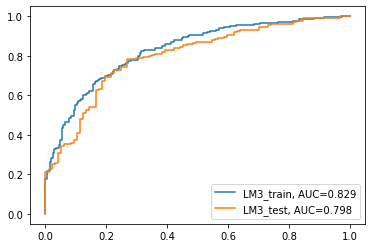

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, pred_lm3_train[:,1])
plt.plot(fpr,tpr,label="LM3_train, AUC="+str(round(roc_auc_score(y_train, pred_lm3_train[:,1]), 3)))

fpr, tpr, thresholds = roc_curve(y_test, pred_lm3[:,1])
plt.plot(fpr,tpr,label="LM3_test, AUC="+str(round(roc_auc_score(y_test, pred_lm3[:,1]), 3)))
plt.legend()
plt.savefig("pdu2_3.pdf", format = 'pdf')

## Część 2

### Znalezienie niepotrzebnych kolumn

In [27]:
list = np.where(lm2.coef_ == 0)

In [28]:
list = list[1]

In [29]:
list

array([ 3,  6,  8, 14, 20, 21, 23, 24, 25, 26, 28, 29, 32, 33, 34, 36, 38,
       41, 42, 43, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 61],
      dtype=int64)

In [40]:
X_del = X.columns[list]

In [44]:
X_del # zmienne nieistotne

Index(['residence_since', 'num_dependents', 'checking_status_0<=X<200',
       'credit_history_delayed previously', 'purpose_domestic appliance',
       'purpose_repairs', 'purpose_vacation', 'purpose_retraining',
       'purpose_business', 'purpose_other', 'savings_status_100<=X<500',
       'savings_status_500<=X<1000', 'employment_unemployed', 'employment_<1',
       'employment_1<=X<4', 'employment_>=7',
       'personal_status_female div/dep/mar', 'personal_status_female single',
       'other_parties_none', 'other_parties_co applicant',
       'property_magnitude_car', 'property_magnitude_no known property',
       'other_payment_plans_bank', 'other_payment_plans_stores',
       'housing_rent', 'housing_for free', 'job_unemp/unskilled non res',
       'job_unskilled resident', 'job_high qualif/self emp/mgmt',
       'own_telephone_none', 'foreign_worker_yes'],
      dtype='object')

In [30]:
X_2 = X.drop(X.columns[list], axis=1)

In [43]:
X_2 # ramka do dalszej pracy

,duration,credit_amount,installment_commitment,age,existing_credits,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_no credits/all paid,credit_history_all paid,...,personal_status_male single,personal_status_male mar/wid,other_parties_guarantor,property_magnitude_real estate,property_magnitude_life insurance,other_payment_plans_none,housing_own,job_skilled,own_telephone_yes,foreign_worker_no
0,6.0,1169.0,4.0,67.0,2.0,1,0,0,0,0,...,1,0,0,1,0,1,1,1,1,0
1,48.0,5951.0,2.0,22.0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
2,12.0,2096.0,2.0,49.0,1.0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0
3,42.0,7882.0,2.0,45.0,1.0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,0,0
4,24.0,4870.0,3.0,53.0,2.0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,31.0,1.0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
996,30.0,3857.0,4.0,40.0,1.0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
997,12.0,804.0,4.0,38.0,1.0,0,0,1,0,0,...,1,0,0,0,0,1,1,1,0,0
998,45.0,1845.0,4.0,23.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


### Model SVM

In [32]:
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size = 0.3, random_state = 320565)

In [33]:
svm_linear = SVC(kernel = 'linear',
                       probability=True, random_state = 320565)

In [34]:
svm_linear.fit(X_train_2, y_train)

SVC(kernel='linear', probability=True, random_state=320565)

In [35]:
y_pred_svm_linear_train = svm_linear.predict(X_train_2)
pred_svm_linear_train = svm_linear.predict_proba(X_train_2)
y_pred_svm_linear = svm_linear.predict(X_test_2)
pred_svm_linear = svm_linear.predict_proba(X_test_2)

#### Dla zbioru testowego

In [36]:
print("precision score svm:", np.round(precision_score(y_test, y_pred_svm_linear), 3))
print("recall score svm:", np.round(recall_score(y_test, y_pred_svm_linear), 3))
print("accuracy svm:", np.round(accuracy_score(y_test, y_pred_svm_linear), 3))
print("auc svm:", np.round(roc_auc_score(y_test, pred_svm_linear[:,1]), 3))

precision score svm: 0.806
recall score svm: 0.857
accuracy svm: 0.763
auc svm: 0.815


#### Dla zbioru treningowego

In [37]:
print("precision score svm:", np.round(precision_score(y_train, y_pred_svm_linear_train), 3))
print("recall score svm:", np.round(recall_score(y_train, y_pred_svm_linear_train), 3))
print("accuracy svm:", np.round(accuracy_score(y_train, y_pred_svm_linear_train), 3))
print("auc svm:", np.round(roc_auc_score(y_train, pred_svm_linear_train[:,1]), 3))

precision score svm: 0.837
recall score svm: 0.865
accuracy svm: 0.784
auc svm: 0.814


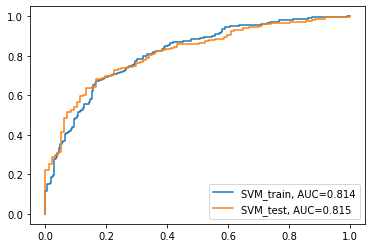

In [38]:
fpr, tpr, thresholds = roc_curve(y_train, pred_svm_linear_train[:,1])
plt.plot(fpr,tpr,label="SVM_train, AUC="+str(round(roc_auc_score(y_train, pred_svm_linear_train[:,1]), 3)))

fpr, tpr, thresholds = roc_curve(y_test, pred_svm_linear[:,1])
plt.plot(fpr,tpr,label="SVM_test, AUC="+str(round(roc_auc_score(y_test, pred_svm_linear[:,1]), 3)))
plt.legend()
plt.savefig("pdu2_4.pdf", format = 'pdf')